In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,4.0,0.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,4.0,1.0,yes,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,2.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,4.0,1.0,no,yes,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(40787, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40787 non-null  int64  
 1   job             40787 non-null  object 
 2   marital         40787 non-null  object 
 3   education       39191 non-null  float64
 4   default         40787 non-null  float64
 5   housing         40787 non-null  object 
 6   loan            40787 non-null  object 
 7   contact         40787 non-null  object 
 8   month           40787 non-null  object 
 9   year            40787 non-null  int64  
 10  day_of_week     40787 non-null  object 
 11  duration        40787 non-null  int64  
 12  campaign        40787 non-null  int64  
 13  pdays           40787 non-null  int64  
 14  previous        40787 non-null  int64  
 15  poutcome        40787 non-null  object 
 16  emp.var.rate    40787 non-null  float64
 17  cons.price.idx  40787 non-null 

# Feature Understanding

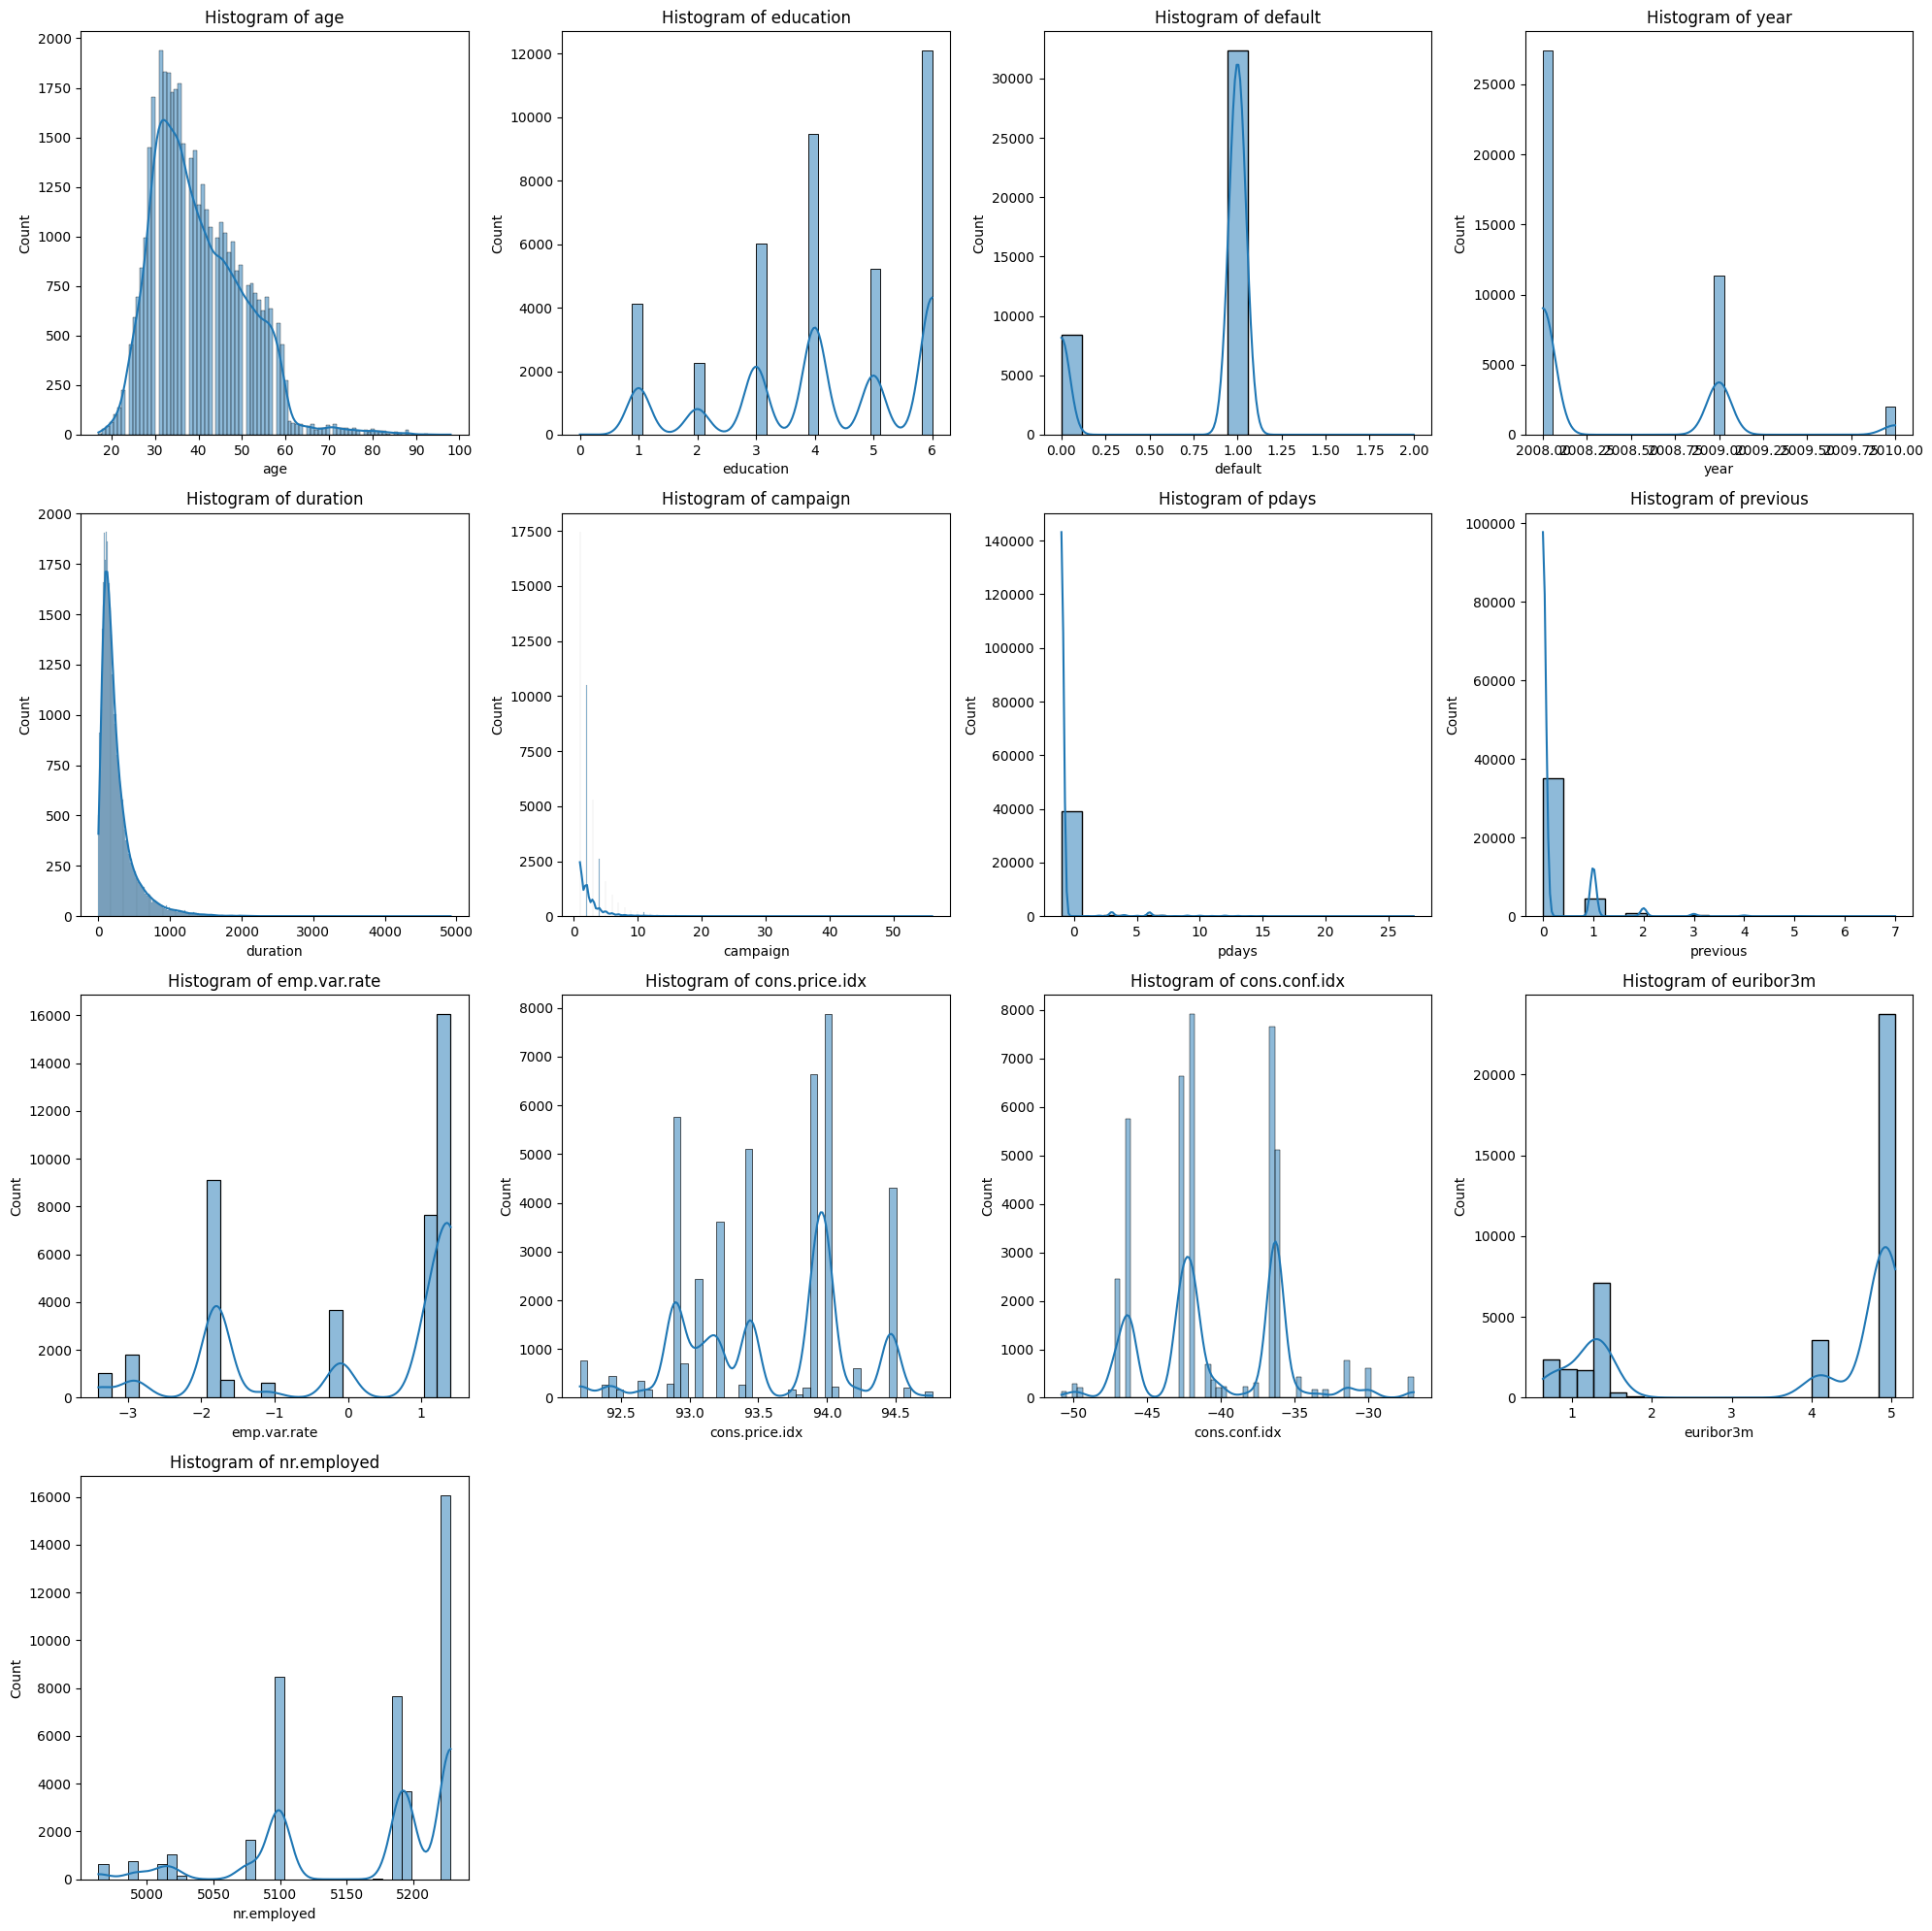

In [17]:
# Define the list of continuous columns
continuous_cols = ["age", "education", "default", "year", "duration", "campaign", "pdays", "previous",
                   "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Set the number of columns and rows for the subplot grid
num_cols = 4
num_rows = len(continuous_cols) // num_cols + (1 if len(continuous_cols) % num_cols > 0 else 0) 

# Initialize the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D axes array

# Loop through the continuous columns and plot the histograms
for idx, col in enumerate(continuous_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {col}')

# Remove extra subplots (if any)
for idx in range(len(continuous_cols), num_rows * num_cols):
    fig.delaxes(axes[idx])

# Display the plots
plt.tight_layout()
plt.show()

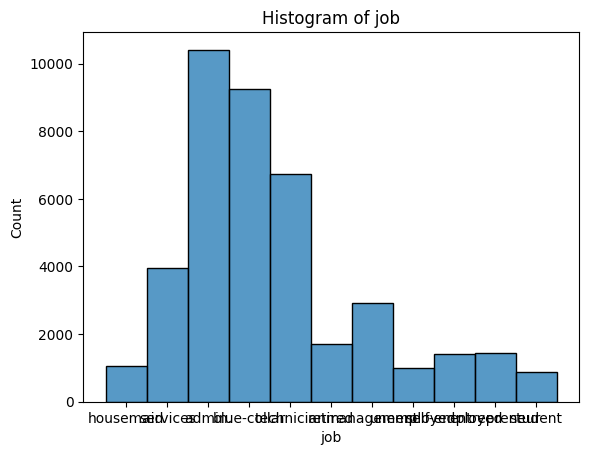

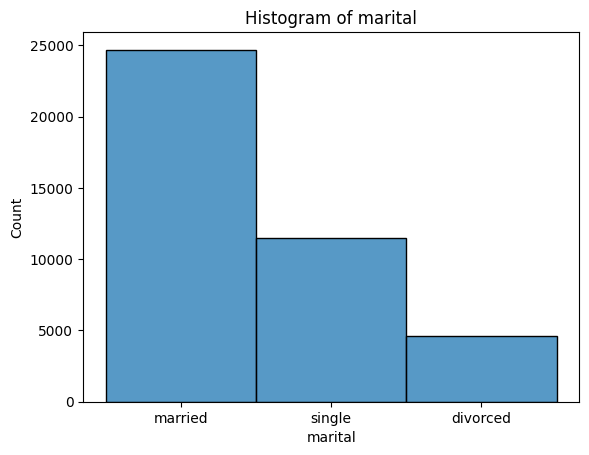

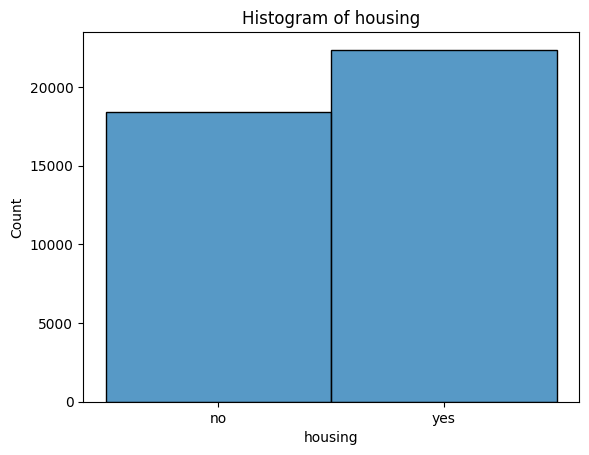

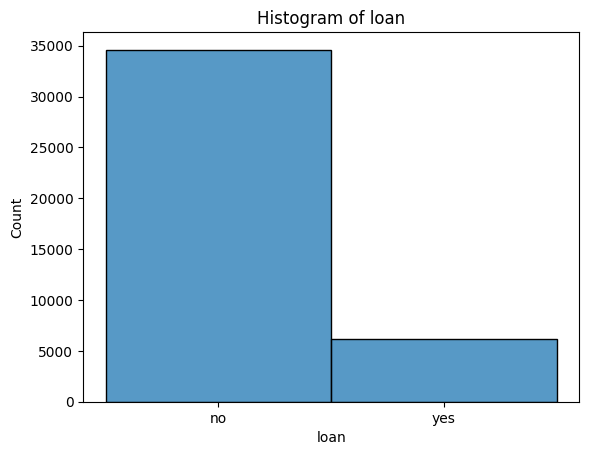

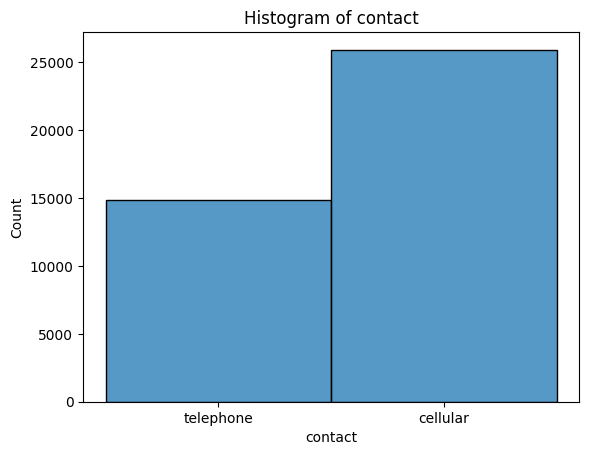

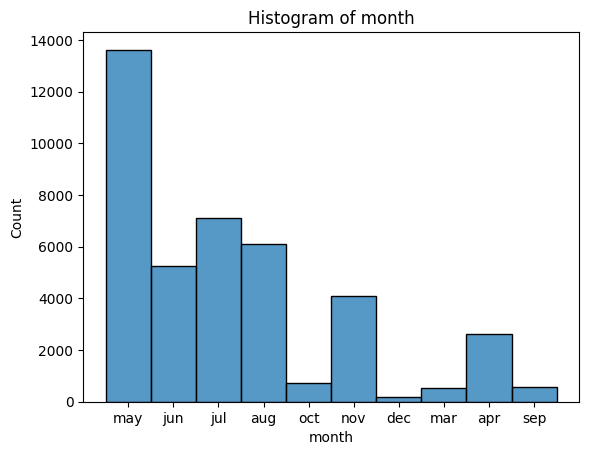

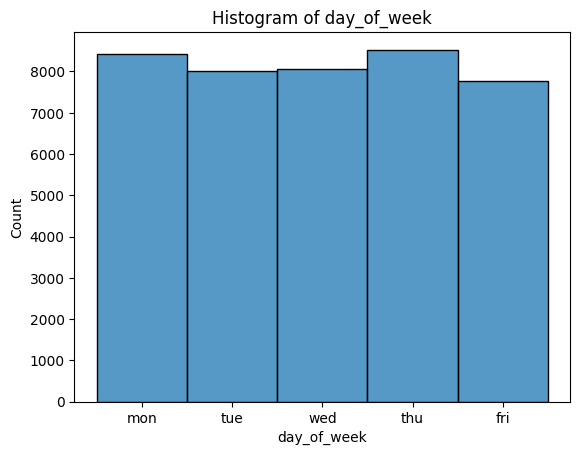

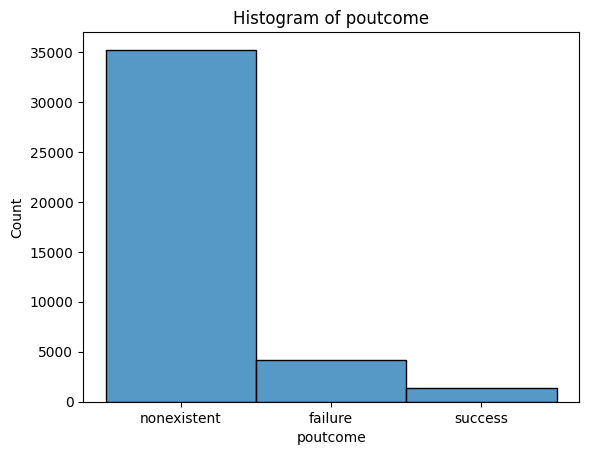

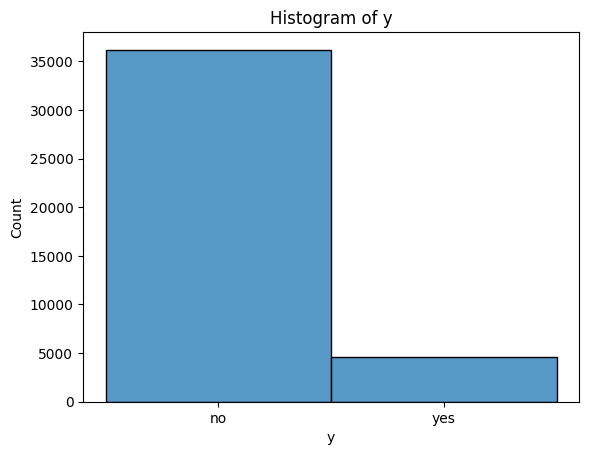

In [15]:
categorical_cols = ["job", "marital", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

# Analyze categorical variables
for col in categorical_cols:
    plt.figure()
    sns.histplot(data=df, x=col,)
    plt.title(f'Histogram of {col}')
    plt.show()